## Propensity Score

### Propensity Score Methods
- 성향 점수는 $P(X)$ 로 정의된다.
  
  - $P(X) = Pr(D=1|X)$
  
- 성향 점수를 활용한다면, X를 스칼라 값으로 대체하여 희소성 문제를 해결할 수 있다.
  
- 현실적으로 $P(X)$ 는 구할 수 없으므로 Logistic Regression, XGBoost 등을 활용하여 $\hat{P}(x)$ 로 추정한다.
  
- 성향 점수에는 여러 방법들이 있지만, **IPW** 방법에 대해 공부하고자 한다.
  
  - **Inverse Propensity Weighting (IPW)**
  
  - Porpensity Score Matching
  
  - Nearest-neighbor Matching
  
  - Coarsened Exact Matching

  - etc...

- 성향 점수는 다음의 가정을 만족해야 된다.
  
  - Common Support: Treatment Group의 unit과 Control Group의 unit 특성이 충분히 겹쳐야 된다.
  
    - $0<Pr(D=1 \mid X) <1$
  
  - Conditional Independence Assumption: $(Y^1,Y^0) \perp D \mid X$

- 위 두 가지 가정을 만족하면, $(Y^1,Y^0) \perp D \mid p(X)$ 를 도출할 수 있다.

- $Proof)$

- $P(X)$를 조건으로 할 때, $D$와 $Y$의 독립성을 보이면 된다.
\begin{align}
   E\big[D\mid Y^0, Y^1, p(X)\big] & =1 \times                                     
   \Pr\big(D=1\mid Y^0, Y^1, p(X)\big)
   \\
    & +0 \times \Pr\big(D=0\mid Y^0, Y^1, p(X)\big)
\end{align}

\begin{align}
   \Pr\big(D=1\mid Y^1,Y^0, p(X)\big) & = \underbrace{{E\big[D\mid Y^1, Y^0, p(X)\big]}}_{\text{See previous equation}}
   \\
        & =\underbrace{{E}                                                                           
   \Big[E \big[D\mid Y^1,Y^0,p(X),X\big] {\mid Y^1,Y^0,p(X)\Big]}}_{ \text{by LIE}}
   \\
        & =\underbrace{{E} \Big[E                                                                    
   \big[D\mid Y^1,Y^0,X\big] {\mid Y^1,Y^0,p(X)\Big]}}_{\text{Given $X$, we know $p(X)$}}
   \\
        & =\underbrace{{E}                                                                           
   \Big[E \big[D\mid X\big] {\mid Y^1,Y^0,p(X)\Big]}}_{ \text{by conditional independence}}
   \\
        & = \underbrace{{E}                                                                          
   \Big[p(X) {\mid Y^1, Y^0, p(X)\Big]}}_{\text{propensity score definition}}
   \\
        & = p(X)                                                                                     
\end{align}
- 위 수식과 아래 수식을 봤을 때, $Y$에 상관없이 $\Pr(D=1\mid Y^1, Y^0, p(X)) = \Pr(D=1\mid p(X))$ 임을 알 수 있다.
  
\begin{align}
   \Pr\big(D=1\mid p(X)\big) & =                                                                             
   \underbrace{E\big[D\mid p(X) \big]}_{\text{Previous argument}}
   \\
            & =\underbrace{E \Big[E\big[D\mid X\big]\mid p(X)\Big]}_{\text{LIE}}
   \\
            & =\underbrace{E\big[p(X)\mid p(X)\mid]}_{\text{definition}}        
   \\
            & = p(X)                                                                        
\end{align}

- $P(X)$는 $X$의 함수이므로 $P(X)$를 조건화 할 때, $X$는 더이상 $D$에 영향을 주지 않는다.
  
     - $\Pr\big(D=1\mid X, p(X)\big) =\Pr\big(D=1\mid X\big) = p(X)$
  
     - 즉, $D \perp X \mid p(X)$ 이므로 $\underbrace{\Pr\big(X \mid D=1, p(X)\big) = \Pr\big(X\mid D=0, p(X)\big)}_{\text{balancing property of the propensity score}}$

### Inverse Propensity Weighting (IPW)
- $X$의 조건 하에서 Treatment Group과 Control Group의 수가 다를 수 있기 때문에, $P(x)$와 $1-P(X)$의 역확률로 가중치를 조절하여 $ATE$를 추정하는 방법
  
- 어떤 특정 $X=x$ 조건 하에서 Treatment 대비 Control 샘플 수가 적을 때($P(X)$의 값이 높다는 의미), 역확률 가중치를 사용하여 Control unit에 높은 가중치를 할당하고, Treatment unit에게 낮은 가중치를 할당한다.

- 마찬가지로 Control 대비 Treatment 샘플 수가 적을 때($P(X)$의 값이 낮다는 의미), 역확률 가중치를 사용하여 Treatment unit에 높은 가중치를 할당하고, Control unit에게 낮은 가중치를 할당한다.
  
  - Treatment Group: $P(X)$, Control Group: $1-P(X)$의 가중치 적용
  
  - 가중치를 적용함으로써 Control unit or Treatment unit 수를 늘려주는 효과를 볼 수 있다.
  
- IPW의 수학적 공식은 다음과 같다.
\begin{align}
   \delta_{ATE} & =E[Y^1-Y^0] \nonumber                                                      
   \\
            & =E \left[ Y \cdot \dfrac{D - p(X)}{p(X) \cdot (1-p(X))} \right]            
   \\
\end{align}
- $Proof)$ $E \left[ \frac{Y D}{p(X)}\right] = E[Y^1] ~~ \textrm{와} ~~ E \left[ \frac{Y (1 - D)}{1 - p(X)}\right] = E[Y^0]$ 임을 보이면 된다.
  - $E \left[ \frac{Y D}{p(X)}\right] = E[Y^1]$ 만 보이도록 하자. ($Y^0$ 증명도 아래와 유사하다.)

\begin{align*}
E \left[ \frac{Y ~T}{p(X)}\right] &= \underbrace{E \left[ E \left[ \frac{Y D}{p(X) }\Bigg| X\right] \right]}_{\text{by LIE}}\\
& = E \left[ E \left[ \frac{Y^1 ~D}{p(X)} \Bigg|X\right] \right]\\
& = E \left[ \frac{E [ Y^1 |X]~ E[D | X]}{p(X)} \right]\\
& = \underbrace{E \left[E [ Y^1 |X] \right]}_{\text{by LIE}}\\
& = E \left[ Y^1 \right]\\
\end{align*}

#### Inverse Propensity Weighting Example
- 세미나 교육 여부에 따라 학업 성취도 차이를 비교해보자.
  - schoolid : 학생의 학교 식발자
  
  - success_expect: 미래의 성공에 대한 자체 기대 평가, 무작위 할당 이전에 측정된 선행 성과에 대한 프록시 변수로 활용
  
  - ethnicity: 학생 인종에 대한 범주형 변수
  
  - gender: 학생 성별에 대한 범주형 변수
  
  - frst_in_family : 가족 중 최초로 대학에 진학했는지에 대한 범주형 범주
  
  - school_urbanicity: 학교가 도시에 위치해 있는지에 대한 범주형 변수(시골, 교외 등)
  
  - school_mindset: 무작위 배정 전에 보고된 학생들의 고정된 마인드셋에 대한 학교 레벨의 평균값(표준화)

  - school_achievement: 시험 점수와 4개의 코호트에 대한 대학 진학 준비성로 측정한 학교 성취도(표준화)

  - school_ethnic_minority: 학교 인종/민족 소수자 구성, 즉 흑인, 라틴계 또는 아메리카 원주민 학생 비율(표준화)

  - school_poverty: 소득이 빈곤선 아래로 떨어지는 가정의 학생 비율(표준화)

  - school_size: 학교 내 4학년 전체 학생 수(표준화) 

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import style
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from causalinference import CausalModel

import graphviz as gr

%matplotlib inline

style.use("fivethirtyeight")
pd.set_option("display.max_columns", 6)

In [3]:
data = pd.read_csv("C:\\Users\\socsoft\\Desktop\\learning_mindset.csv")
data.sample(5, random_state=5)

,schoolid,intervention,achievement_score,...,school_ethnic_minority,school_poverty,school_size
259,73,1,1.480828,...,-0.515202,-0.169849,0.173954
3435,76,0,-0.987277,...,-1.310927,0.224077,-0.426757
9963,4,0,-0.152340,...,0.875012,-0.724801,0.761781
4488,67,0,0.358336,...,0.315755,0.054586,1.862187
2637,16,1,1.360920,...,-0.033161,-0.982274,1.591641


- 세미나의 참여 여부와 학생의 성공 기대치간 상관 관계가 존재하므로 외부 변수를 통제하여 $\hat {ATE}$를 구해야 함.
  
  - 자기계발 성공기대도가 높은 학생들일수록 성장 세미나 교육에 참여할 가능성이 점점 더 높아지는 추세를 보이고 있다.

In [7]:
data.groupby("success_expect")["intervention"].mean()

success_expect
1    0.271739
2    0.265957
3    0.294118
4    0.271617
5    0.311070
6    0.354287
7    0.362319
Name: intervention, dtype: float64

- 변주형 변수 더미로 변환 (전처리)

In [4]:
categ = ["ethnicity", "gender", "school_urbanicity"]
cont = ["school_mindset", "school_achievement", "school_ethnic_minority", "school_poverty", "school_size"]

data_with_categ = pd.concat([
    data.drop(columns=categ), # dataset without the categorical features
    pd.get_dummies(data[categ], columns=categ, drop_first=False)# categorical features converted to dummies
], axis=1)

print(data_with_categ.shape)

(10391, 32)


- 로지스틱 회귀를 사용하여 성향 점수 추정

In [ ]:
from sklearn.linear_model import LogisticRegression

T = 'intervention'
Y = 'achievement_score'
X = data_with_categ.columns.drop(['schoolid', T, Y])

ps_model = LogisticRegression(C=1e6).fit(data_with_categ[X], data_with_categ[T])

data_ps = data.assign(propensity_score=ps_model.predict_proba(data_with_categ[X])[:, 1])

data_ps[["intervention", "achievement_score", "propensity_score"]].head()

- 성향 점수의 가중치를 적용하여 Treatment 와 Control 샘플 수를 거의 동일하게 생성

In [6]:
weight_t = 1/data_ps.query("intervention==1")["propensity_score"]
weight_nt = 1/(1-data_ps.query("intervention==0")["propensity_score"])
print("Original Sample Size", data.shape[0])
print("Treated Population Sample Size", sum(weight_t))
print("Untreated Population Sample Size", sum(weight_nt))

Original Sample Size 10391
Treated Population Sample Size 10388.455588923738
Untreated Population Sample Size 10391.474224369262


- 성향 점수를 통해 교란 변수 존재 확인

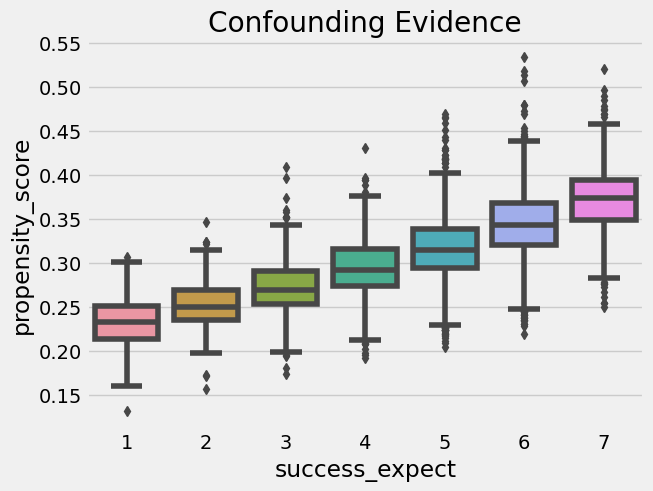

In [11]:
sns.boxplot(x="success_expect", y="propensity_score", data=data_ps)
plt.title("Confounding Evidence");

- Treatment와 Control Group의 $\hat {P(x)}$ 분포가 균형적으로 구성되었는지 확인

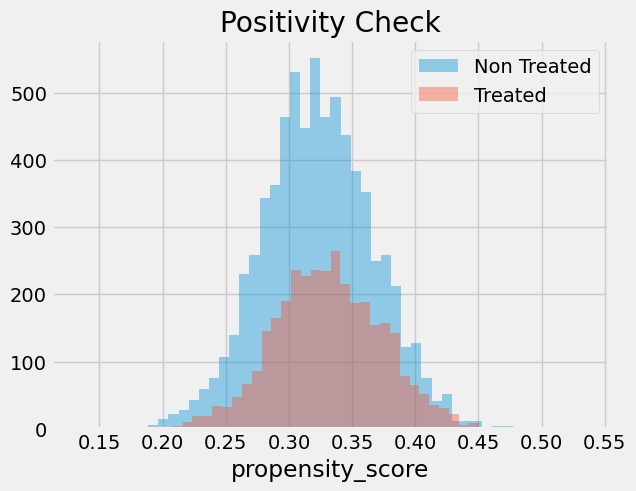

In [12]:
sns.distplot(data_ps.query("intervention==0")["propensity_score"], kde=False, label="Non Treated")
sns.distplot(data_ps.query("intervention==1")["propensity_score"], kde=False, label="Treated")
plt.title("Positivity Check")
plt.legend();

- IPW의 $\hat {ATE}$ 값

In [7]:
weight = ((data_ps["intervention"]-data_ps["propensity_score"]) /
          (data_ps["propensity_score"]*(1-data_ps["propensity_score"])))

y1 = sum(data_ps.query("intervention==1")["achievement_score"]*weight_t) / len(data)
y0 = sum(data_ps.query("intervention==0")["achievement_score"]*weight_nt) / len(data)

ate = np.mean(weight * data_ps["achievement_score"])

print("Y1:", y1)
print("Y0:", y0)
print("ATE", np.mean(weight * data_ps["achievement_score"]))

Y1: 0.259596818277185
Y0: -0.12893121454913065
ATE 0.3885280328263156


- 부스트트랩을 활용하여 $\hat {ATE}$ 분포 확인

In [8]:
from joblib import Parallel, delayed # for parallel processing

# define function that computes the IPTW estimator
def run_ps(df, X, T, y):
    # estimate the propensity score
    ps = LogisticRegression(C=1e6).fit(df[X], df[T]).predict_proba(df[X])[:, 1]
    
    weight = (df[T]-ps) / (ps*(1-ps)) # define the weights
    return np.mean(weight * df[y]) # compute the ATE

np.random.seed(88)
# run 1000 bootstrap samples
bootstrap_sample = 1000
ates = Parallel(n_jobs=4)(delayed(run_ps)(data_with_categ.sample(frac=1, replace=True), X, T, Y)
                          for _ in range(bootstrap_sample))
ates = np.array(ates)

In [15]:
print(f"ATE: {ates.mean()}")
print(f"95% C.I.: {(np.percentile(ates, 2.5), np.percentile(ates, 97.5))}")

ATE: 0.38774621859220393
95% C.I.: (0.3544790373815894, 0.41992765788357406)


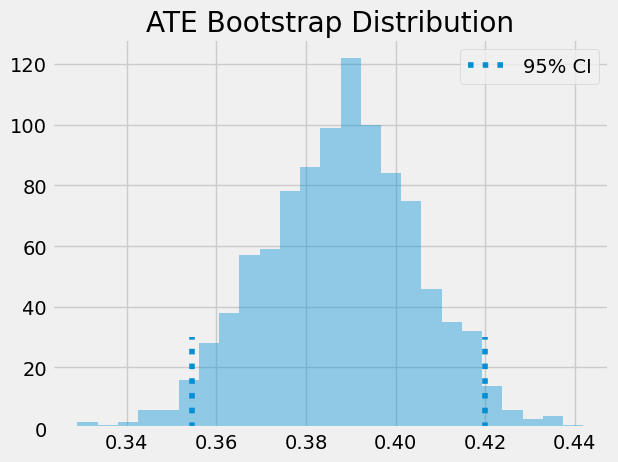

In [16]:
sns.distplot(ates, kde=False)
plt.vlines(np.percentile(ates, 2.5), 0, 30, linestyles="dotted")
plt.vlines(np.percentile(ates, 97.5), 0, 30, linestyles="dotted", label="95% CI")
plt.title("ATE Bootstrap Distribution")
plt.legend();

### Propensity Score Matching Example

In [9]:
smf.ols("achievement_score ~ intervention + propensity_score", data=data_ps).fit().summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-3.0770,0.065,-47.054,0.000,-3.205,-2.949
intervention,0.3930,0.019,20.974,0.000,0.356,0.430
propensity_score,9.0553,0.200,45.306,0.000,8.664,9.447


### 성향 점수 추정시 고려사항
- 성향 점수의 예측 성능이 균형 속성으로 변환되지 않는다.
  
    - 성향 점수는 Treatment의 확률을 잘 예측하는 것에 초점을 두는 것보다 Confounder 변수를 찾는 것에 집중해야 된다.

- 만약 학교(school)가 T와 관련있지만 Y에 영향을 미치지 않는다면 학교를 통제할 필요가 없다.

In [7]:
np.random.seed(42)
school_a = pd.DataFrame(dict(T=np.random.binomial(1, .99, 400), school=0, intercept=1))
school_b = pd.DataFrame(dict(T=np.random.binomial(1, .01, 400), school=1, intercept=1))
ex_data = pd.concat([school_a, school_b]).assign(y = lambda d: np.random.normal(1 + 0.1 * d["T"]))
ex_data.head()

,T,school,intercept,y
0,1,0,1,0.309526
1,1,0,1,1.571468
2,1,0,1,2.982024
3,1,0,1,2.445420
4,1,0,1,2.693187


- 학교를 추가한 $P(X)$의 분포는 큰 분산을 가진다. 따라서 학교를 추가하지 않는 $P(X)$의 분포가 오히려 낫다는 것을 의미한다.

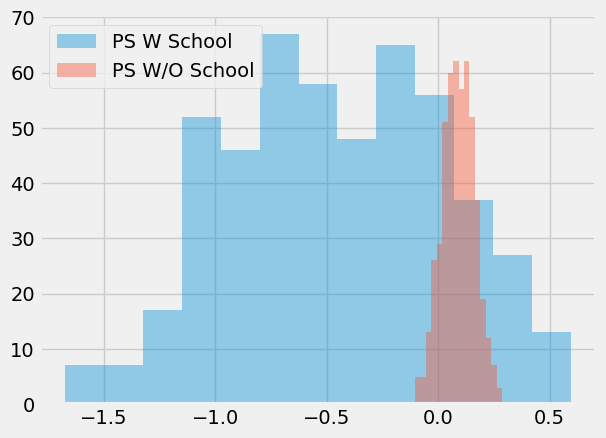

In [8]:
ate_w_f = np.array([run_ps(ex_data.sample(frac=1, replace=True), ["school"], "T", "y") for _ in range(500)])
ate_wo_f = np.array([run_ps(ex_data.sample(frac=1, replace=True), ["intercept"], "T", "y") for _ in range(500)])

sns.distplot(ate_w_f, kde=False, label="PS W School")
sns.distplot(ate_wo_f, kde=False, label="PS W/O School")
plt.legend();